In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import math

In [2]:
df=pd.read_excel("cleaned.xlsx")
df.head()

,hydrulic,dc/h,Inclination,steps,E20
0,0.000056,0.010635,0.639524,100,0.780823
1,0.000042,0.008779,0.639524,100,0.852661
2,0.000028,0.006700,0.639524,100,0.863603
3,0.000014,0.004221,0.639524,100,0.913133
4,0.000056,0.010635,0.639524,64,0.644987


In [3]:
df['hydrulic']=df['hydrulic']*3
df.head()

,hydrulic,dc/h,Inclination,steps,E20
0,0.000167,0.010635,0.639524,100,0.780823
1,0.000125,0.008779,0.639524,100,0.852661
2,0.000083,0.006700,0.639524,100,0.863603
3,0.000042,0.004221,0.639524,100,0.913133
4,0.000167,0.010635,0.639524,64,0.644987


In [4]:
df.dtypes

hydrulic       float64
dc/h           float64
Inclination    float64
steps            int64
E20            float64
dtype: object

In [5]:
x=df.drop(['E20'],axis=1)
y=df[['E20']]

In [6]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=0)

# **LinearRegression**

In [7]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(xtrain,ytrain)

LinearRegression()

In [8]:
ypred_lr=lr_model.predict(xtest)

In [9]:
from sklearn.metrics import r2_score
print("LinearRegression score (Test data) {:.2f}".format(r2_score(ytest,ypred_lr)*100))

LinearRegression score (Test data) 88.07


In [10]:
ypred_lr2=lr_model.predict(xtrain)

In [11]:
print("LinearRegression score (Training data) {:.2f}".format(r2_score(ytrain,ypred_lr2)*100))

LinearRegression score (Training data) 84.11


In [12]:
df9=pd.DataFrame(np.concatenate((ypred_lr.reshape(len(ypred_lr),1),ytest.values.reshape(len(ytest),1)),1),
                 columns=['LR_Predicted','Actual'])
df9.head(3)

,LR_Predicted,Actual
0,0.647259,0.725971
1,0.474162,0.415702
2,0.766879,0.734586


In [13]:
df10=pd.DataFrame(np.concatenate((ypred_lr2.reshape(len(ypred_lr2),1),ytrain.values.reshape(len(ytrain),1)),1),
                 columns=['LR_Predicted','Actual'])
df10.head(3)

,LR_Predicted,Actual
0,0.835752,0.852864
1,0.741735,0.643036
2,0.648148,0.720944


In [14]:
print("Intercept",lr_model.intercept_)
print("Coefficient",lr_model.coef_)

Intercept [0.15471786]
Coefficient [[-1.78196847e+03  1.35727507e+01  5.68396189e-01  4.15035330e-03]]


In [15]:
pd.DataFrame({"Feature":x.columns.tolist(),"Coefficients":lr_model.coef_[0]})

,Feature,Coefficients
0,hydrulic,-1781.968466
1,dc/h,13.572751
2,Inclination,0.568396
3,steps,0.004150


# **DecisionTreeRegressor**


In [24]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(max_depth=7,min_samples_split=10, max_leaf_nodes=20)
dt_model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=7, max_leaf_nodes=20, min_samples_split=10)

In [25]:
ypred_dc=dt_model.predict(xtest)

In [26]:
print("DecisionTreeRegressor Score (Test data) {:.2f}".format(r2_score(ypred_dc,ytest)*100))

DecisionTreeRegressor Score (Test data) 88.06


In [27]:
ypred_dc2=dt_model.predict(xtrain)

In [28]:
print("DecisionTreeRegressor Score (Train data) {:.2f}".format(r2_score(ypred_dc2,ytrain)*100))

DecisionTreeRegressor Score (Train data) 88.96


In [29]:
df7=pd.DataFrame(np.concatenate((ypred_dc.reshape(len(ypred_dc),1),ytest.values.reshape(len(ytest),1)),1),
                 columns=['DT_Predicted','Actual'])
df7.head(3)

,DT_Predicted,Actual
0,0.738135,0.725971
1,0.411328,0.415702
2,0.738135,0.734586


In [30]:
df8=pd.DataFrame(np.concatenate((ypred_dc2.reshape(len(ypred_dc2),1),ytrain.values.reshape(len(ytrain),1)),1),
                 columns=['DT_Predicted','Actual'])
df8.tail(3)

,DT_Predicted,Actual
102,0.738135,0.713646
103,0.364157,0.339726
104,0.738135,0.716841


# **RandomForestRegressor**

In [102]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators = 20, random_state = 0,bootstrap=True)
rf_model.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=20, random_state=0)

In [103]:
ypred_rf=rf_model.predict(xtest)

In [104]:
print("RandomForestRegressor Score (Test data) {:.2f}".format(r2_score(ypred_rf,ytest)*100))

RandomForestRegressor Score (Test data) 87.05


In [105]:
ypred_rf2=rf_model.predict(xtrain)

In [106]:
print("RandomForestRegressor Score (Train data) {:.2f}".format(r2_score(ypred_rf2,ytrain)*100))

RandomForestRegressor Score (Train data) 97.08


In [107]:
df5=pd.DataFrame(np.concatenate((ypred_rf.reshape(len(ypred_rf),1),ytest.values.reshape(len(ytest),1)),1),
                 columns=['RF_Predicted','Actual'])
df5.head(3)

,RF_Predicted,Actual
0,0.723609,0.725971
1,0.408772,0.415702
2,0.732725,0.734586


In [108]:
df6=pd.DataFrame(np.concatenate((ypred_rf2.reshape(len(ypred_rf2),1),ytrain.values.reshape(len(ytrain),1)),1),
                 columns=['RF_Predicted','Actual'])
df6.head(3)

,RF_Predicted,Actual
0,0.844101,0.852864
1,0.650291,0.643036
2,0.714862,0.720944


# **GradientBoostingRegressor**

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

In [111]:
gbr_model=GradientBoostingRegressor(learning_rate=0.03,max_depth=3,max_features=3,n_estimators=250,random_state=0)
gbr_model.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.03, max_features=3, n_estimators=250,
                          random_state=0)

In [112]:
ypred_gbr=gbr_model.predict(xtest)

In [113]:
print("GradientBoostingRegressor Score (Test data) {:.2f}".format(r2_score(ypred_gbr,ytest)*100))

GradientBoostingRegressor Score (Test data) 92.59


In [114]:
ypred_gbr2=gbr_model.predict(xtrain)

In [115]:
print("GradientBoostingRegressor Score (Train data) {:.2f}".format(r2_score(ypred_gbr2,ytrain)*100))

GradientBoostingRegressor Score (Train data) 97.69


In [116]:
df3=pd.DataFrame(np.concatenate((ypred_gbr.reshape(len(ypred_gbr),1),ytest.values.reshape(len(ytest),1)),1),
 columns=['GBR_Predicted','Actual'])
df3.head()

,GBR_Predicted,Actual
0,0.729750,0.725971
1,0.413185,0.415702
2,0.771424,0.734586
3,0.674581,0.624565
4,0.373989,0.427666


In [117]:
df4=pd.DataFrame(np.concatenate((ypred_gbr2.reshape(len(ypred_gbr2),1),ytrain.values.reshape(len(ytrain),1)),1),
 columns=['GBR_Predicted','Actual'])
df4.head()

,GBR_Predicted,Actual
0,0.831755,0.852864
1,0.643179,0.643036
2,0.736265,0.720944
3,0.431534,0.372806
4,0.427445,0.449174


# **KNN Algoritm**

In [118]:
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=3,metric='minkowski',leaf_size=10)
knn_model.fit(xtrain,ytrain)

KNeighborsRegressor(leaf_size=10, n_neighbors=3)

In [119]:
ypred_knn=knn_model.predict(xtest)

In [120]:
print("KNeighborsRegressor score (Test data) {:.2f}".format(r2_score(ypred_knn,ytest)*100))

KNeighborsRegressor score (Test data) 79.72


In [121]:
ypred_knn2=knn_model.predict(xtrain)

In [122]:
print("KNeighborsRegressor score (Train data) {:.2f}".format(r2_score(ypred_knn2,ytrain)*100))

KNeighborsRegressor score (Train data) 86.19


In [123]:
df1=pd.DataFrame(np.concatenate((ypred_knn.reshape(len(ypred_knn),1),ytest.values.reshape(len(ytest),1)),1),
                 columns=['KNN_Predicted','Actual'])
df1.head()

,KNN_Predicted,Actual
0,0.711977,0.725971
1,0.403364,0.415702
2,0.721046,0.734586
3,0.665919,0.624565
4,0.385303,0.427666


In [124]:
df2=pd.DataFrame(np.concatenate((ypred_knn2.reshape(len(ypred_knn2),1),ytrain.values.reshape(len(ytrain),1)),1),
                 columns=['KNN_Predicted','Actual'])
df2.head(3)

,KNN_Predicted,Actual
0,0.758432,0.852864
1,0.717474,0.643036
2,0.699334,0.720944


In [126]:
pickle.dump(knn_model,open('knn_model.pkl','wb'))
pickle.dump(gbr_model,open('gbr_model.pkl','wb'))
pickle.dump(rf_model,open('rf_model.pkl','wb'))
pickle.dump(dt_model,open('dt_model.pkl','wb'))
pickle.dump(lr_model,open('lr_model.pkl','wb'))

In [127]:
dt_model=pickle.load(open('dt_model.pkl','rb'))
knn_model=pickle.load(open('knn_model.pkl','rb'))
lr_model=pickle.load(open('lr_model.pkl','rb'))
rf_model=pickle.load(open('rf_model.pkl','rb'))
gbr_model=pickle.load(open('gbr_model.pkl','rb'))

# **R2_score for training & Test data**

In [129]:
print("LinearRg Score Test Data {:.2f}".format(r2_score(ypred_lr,ytest)*100))
print("DecTree Score test Data {:.2f}".format(r2_score(ypred_dc,ytest)*100))
print("RandomF Score test Data {:.2f}".format(r2_score(ypred_rf,ytest)*100))
print("gradient Score Test Data {:.2f}".format(r2_score(ypred_gbr,ytest)*100))
print("knn Score Test Data {:.2f}".format(r2_score(ypred_knn,ytest)*100))

LinearRg Score Test Data 86.78
DecTree Score test Data 88.06
RandomF Score test Data 87.05
gradient Score Test Data 92.59
knn Score Test Data 79.72


In [130]:
print("LinearRg Score Train Data {:.2f}".format(r2_score(ypred_lr2,ytrain)*100))
print("DecTree Score Train Data {:.2f}".format(r2_score(ypred_dc2,ytrain)*100))
print("RandomF Score Train Data {:.2f}".format(r2_score(ypred_rf2,ytrain)*100))
print("gradient Score Train Data {:.2f}".format(r2_score(ypred_gbr2,ytrain)*100))
print("knn Score Train Data {:.2f}".format(r2_score(ypred_knn2,ytrain)*100))

LinearRg Score Train Data 81.11
DecTree Score Train Data 88.96
RandomF Score Train Data 97.08
gradient Score Train Data 97.69
knn Score Train Data 86.19


In [131]:
data=pd.concat([df1,df3,df5,df7,df9],axis=1)
data.head()

,KNN_Predicted,Actual,GBR_Predicted,Actual,RF_Predicted,Actual,DT_Predicted,Actual,LR_Predicted,Actual
0,0.711977,0.725971,0.729750,0.725971,0.723609,0.725971,0.738135,0.725971,0.647259,0.725971
1,0.403364,0.415702,0.413185,0.415702,0.408772,0.415702,0.411328,0.415702,0.474162,0.415702
2,0.721046,0.734586,0.771424,0.734586,0.732725,0.734586,0.738135,0.734586,0.766879,0.734586
3,0.665919,0.624565,0.674581,0.624565,0.681039,0.624565,0.659330,0.624565,0.572193,0.624565
4,0.385303,0.427666,0.373989,0.427666,0.378803,0.427666,0.404038,0.427666,0.385990,0.427666


In [132]:
data.to_excel("Test_data.xlsx",index=False)

In [133]:
data2=pd.concat([df2,df4,df6,df8,df10],axis=1)
data2.head()

,KNN_Predicted,Actual,GBR_Predicted,Actual,RF_Predicted,Actual,DT_Predicted,Actual,LR_Predicted,Actual
0,0.758432,0.852864,0.831755,0.852864,0.844101,0.852864,0.883335,0.852864,0.835752,0.852864
1,0.717474,0.643036,0.643179,0.643036,0.650291,0.643036,0.679655,0.643036,0.741735,0.643036
2,0.699334,0.720944,0.736265,0.720944,0.714862,0.720944,0.688419,0.720944,0.648148,0.720944
3,0.464619,0.372806,0.431534,0.372806,0.438366,0.372806,0.506122,0.372806,0.508057,0.372806
4,0.417377,0.449174,0.427445,0.449174,0.398057,0.449174,0.411328,0.449174,0.423583,0.449174


In [134]:
data2.to_excel("Train_data.xlsx",index=False)

# **Test**

In [135]:
ypred_lr=lr_model.predict(xtest)
ypred_dt=dt_model.predict(xtest)
ypred_rf=rf_model.predict(xtest)
ypred_knn=knn_model.predict(xtest)
ypred_gbr=gbr_model.predict(xtest)

In [136]:
knn_test=r2_score(ypred_knn,ytest)
lr_test=r2_score(ypred_lr,ytest)
rf_test=r2_score(ypred_rf,ytest)
dt_test=r2_score(ypred_dt,ytest)
gbr_test=r2_score(ypred_gbr,ytest)

In [137]:
knn_mae=mean_absolute_error(ypred_knn,ytest)
lr_mae=mean_absolute_error(ypred_lr,ytest)
rf_mae=mean_absolute_error(ypred_rf,ytest)
dt_mae=mean_absolute_error(ypred_dt,ytest)
gbr_mae=mean_absolute_error(ypred_gbr,ytest)

In [138]:
knn_mse=mean_squared_error(ypred_knn,ytest)
lr_mse=mean_squared_error(ypred_lr,ytest)
rf_mse=mean_squared_error(ypred_rf,ytest)
dt_mse=mean_squared_error(ypred_dt,ytest)
gbr_mse=mean_squared_error(ypred_gbr,ytest)

In [139]:
knn_rmse=math.sqrt(knn_mse)
lr_rmse=math.sqrt(lr_mse)
rf_rmse=math.sqrt(rf_mse)
dt_rmse=math.sqrt(dt_mse)
gbr_rmse=math.sqrt(gbr_mse)

In [140]:
algos=['DT','RFR','KNN','GBR']
r2=[dt_test,rf_test,knn_test,gbr_test]
rmse=[dt_rmse,rf_rmse,knn_rmse,gbr_rmse]
mse=[dt_mse,rf_mae,knn_mae,gbr_mae]
mae=[dt_mae,rf_mae,knn_mae,gbr_mae]

In [141]:
various=pd.DataFrame([r2,mse,rmse,mae],columns=algos,index=['R2','MSE','RMSE','MAE'])
various

,DT,RFR,KNN,GBR
R2,0.880573,0.870491,0.797186,0.925870
MSE,0.002868,0.040721,0.051326,0.031974
RMSE,0.053558,0.057395,0.067486,0.043894
MAE,0.039188,0.040721,0.051326,0.031974


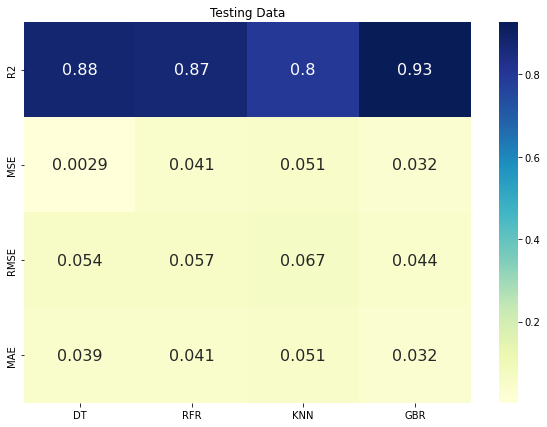

In [142]:
plt.figure(figsize=(10,7))
sns.heatmap(data=various,cmap='YlGnBu',annot=True,annot_kws={"size": 16})
ax = plt.axes()
ax.set_title("Testing Data")
plt.savefig("Testing")

# **Train Data**

In [143]:
ypred_lr2=lr_model.predict(xtrain)
ypred_dt2=dt_model.predict(xtrain)
ypred_rf2=rf_model.predict(xtrain)
ypred_knn2=knn_model.predict(xtrain)
ypred_gbr2=gbr_model.predict(xtrain)

In [144]:
knn_train=r2_score(ypred_knn2,ytrain)
lr_train=r2_score(ypred_lr2,ytrain)
rf_train=r2_score(ypred_rf2,ytrain)
dt_train=r2_score(ypred_dt2,ytrain)
gbr_train=r2_score(ypred_gbr2,ytrain)

In [145]:
knn_mse2=mean_squared_error(ypred_knn2,ytrain)
lr_mse2=mean_squared_error(ypred_lr2,ytrain)
rf_mse2=mean_squared_error(ypred_rf2,ytrain)
dt_mse2=mean_squared_error(ypred_dt2,ytrain)
gbr_mse2=mean_squared_error(ypred_gbr2,ytrain)

In [146]:
knn_rmse2=math.sqrt(knn_mse2)
lr_rmse2=math.sqrt(lr_mse2)
rf_rmse2=math.sqrt(rf_mse2)
dt_rmse2=math.sqrt(dt_mse2)
gbr_rmse2=math.sqrt(gbr_mse2)

In [147]:
knn_mae2=mean_absolute_error(ypred_knn2,ytrain)
lr_mae2=mean_absolute_error(ypred_lr2,ytrain)
rf_mae2=mean_absolute_error(ypred_rf2,ytrain)
dt_mae2=mean_absolute_error(ypred_dt2,ytrain)
gbr_mae2=mean_absolute_error(ypred_gbr2,ytrain)

In [148]:
algos=['DT','RFR','KNN','GBR']
r2=[dt_train,rf_train,knn_train,gbr_train]
rmse=[dt_rmse2,rf_rmse2,knn_rmse2,gbr_rmse2]
mse=[dt_mse2,rf_mae2,knn_mae2,gbr_mae2]
mae=[dt_mae2,rf_mae2,knn_mae2,gbr_mae2]

In [149]:
various2=pd.DataFrame([r2,mse,rmse,mae],columns=algos,index=['R2','MSE','RMSE','MAE'])
various2

,DT,RFR,KNN,GBR
R2,0.889561,0.970816,0.861943,0.976918
MSE,0.002609,0.018371,0.042197,0.016644
RMSE,0.051077,0.026448,0.055383,0.023742
MAE,0.038218,0.018371,0.042197,0.016644


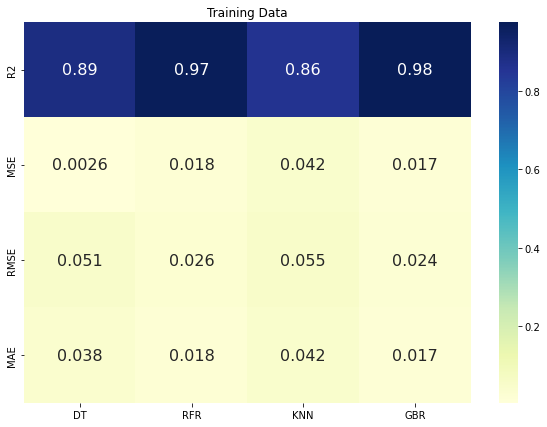

In [150]:
plt.figure(figsize=(10,7))
sns.heatmap(data=various2,cmap='YlGnBu',annot=True,annot_kws={"size": 16})
ax = plt.axes()
ax.set_title("Training Data")
plt.savefig("Training")

# **IQR for Test Data**

In [151]:
ytest2=ytest.sort_values(ascending=False,by=['E20'])

In [152]:
ytest2.shape

(35, 1)

In [153]:
q1=np.median(ytest2['E20'][:17])
q1

0.7345864470556327

In [154]:
q2=np.median(ytest2['E20'][17:])
print(q2)
q3=np.median(ytest2['E20'])
print(q3)

0.48821495708875046
0.6261161002483739


In [155]:
IQR=q1-q2
print("Actual IQR",IQR)

Actual IQR 0.24637148996688224


In [156]:
ypred_knn2=pd.DataFrame(ypred_knn,columns=['knn'])
ypred_knn2.head()

,knn
0,0.711977
1,0.403364
2,0.721046
3,0.665919
4,0.385303


In [157]:
ypred_knn2=ypred_knn2.sort_values(by='knn',ascending=False)

In [158]:
q4=np.median(ypred_knn2['knn'][:17])
q5=np.median(ypred_knn2['knn'][17:])
q6=np.median(ypred_knn2['knn'])
print(q4,q5,q6)
IQR_knn=q4-q5
print(IQR_knn)

0.7198173344740045 0.4409977442763461 0.605472805238378
0.27881959019765845


In [159]:
ypred_dt2=pd.DataFrame(ypred_dt,columns=['dt'])
ypred_dt2.head(3)

,dt
0,0.738135
1,0.411328
2,0.738135


In [160]:
ypred_dt2=ypred_dt2.sort_values(by='dt',ascending=False)

In [161]:
q7=np.median(ypred_dt2['dt'][:17])
q8=np.median(ypred_dt2['dt'][17:])
q9=np.median(ypred_dt2['dt'])
print(q7,q8,q9)
IQR_dt=q7-q8
print(IQR_dt)

0.7381347609423873 0.5035592975494803 0.6593304530686178
0.23457546339290702


In [162]:
ypred_rf2=pd.DataFrame(ypred_rf,columns=['rf'])

In [163]:
ypred_rf2=ypred_rf2.sort_values(by='rf',ascending=False)

In [164]:
q10=np.median(ypred_rf2['rf'][:17])
q11=np.median(ypred_rf2['rf'][17:])
q12=np.median(ypred_rf2['rf'])
print(q10,q11,q12)
IQR_rf=q10-q11
print(IQR_rf)

0.7266272460277039 0.47411467953864067 0.6810385472113888
0.25251256648906323


In [165]:
ypred_gbr2=pd.DataFrame(ypred_gbr,columns=['gbr'])

In [166]:
ypred_gbr2=ypred_gbr2.sort_values(by='gbr',ascending=False)

In [168]:
q13=np.median(ypred_gbr2['gbr'][:17])
q14=np.median(ypred_gbr2['gbr'][17:])
q15=np.median(ypred_gbr2['gbr'])
print(q10,q11,q12)

0.7266272460277039 0.47411467953864067 0.6810385472113888


In [169]:
IQR_gbr=q13-q14
print(IQR_gbr)

0.2582590607453283


In [170]:
IQR_test=pd.DataFrame({'Summary':['OBS','KNN','GBR','RFR','DTR'],'Q1':[q1,q4,q13,q10,q7],'Q2':[q2,q5,q14,q11,q8],
                       'Q3':[q3,q6,q15,q12,q9],'IQR':[IQR,IQR_knn,IQR_gbr,IQR_rf,IQR_dt]})
                      
IQR_test

,Summary,Q1,Q2,Q3,IQR
0,OBS,0.734586,0.488215,0.626116,0.246371
1,KNN,0.719817,0.440998,0.605473,0.278820
2,GBR,0.746853,0.488594,0.660485,0.258259
3,RFR,0.726627,0.474115,0.681039,0.252513
4,DTR,0.738135,0.503559,0.659330,0.234575


In [171]:
IQR_test.to_excel("IQR_test.xlsx",index=False)

In [172]:
IQR_test2=IQR_test.T
IQR_test2

,0,1,2,3,4
Summary,OBS,KNN,GBR,RFR,DTR
Q1,0.734586,0.719817,0.746853,0.726627,0.738135
Q2,0.488215,0.440998,0.488594,0.474115,0.503559
Q3,0.626116,0.605473,0.660485,0.681039,0.65933
IQR,0.246371,0.27882,0.258259,0.252513,0.234575


In [173]:
IQR_test2=IQR_test2.reset_index()

In [174]:
IQR_test2.columns=IQR_test2.iloc[0]

In [175]:
IQR_test2=IQR_test2[1:]
IQR_test2

,Summary,OBS,KNN,GBR,RFR,DTR
1,Q1,0.734586,0.719817,0.746853,0.726627,0.738135
2,Q2,0.488215,0.440998,0.488594,0.474115,0.503559
3,Q3,0.626116,0.605473,0.660485,0.681039,0.65933
4,IQR,0.246371,0.27882,0.258259,0.252513,0.234575


In [176]:
IQR_test2=IQR_test2.drop(index=4,axis=0)
IQR_test2

,Summary,OBS,KNN,GBR,RFR,DTR
1,Q1,0.734586,0.719817,0.746853,0.726627,0.738135
2,Q2,0.488215,0.440998,0.488594,0.474115,0.503559
3,Q3,0.626116,0.605473,0.660485,0.681039,0.65933


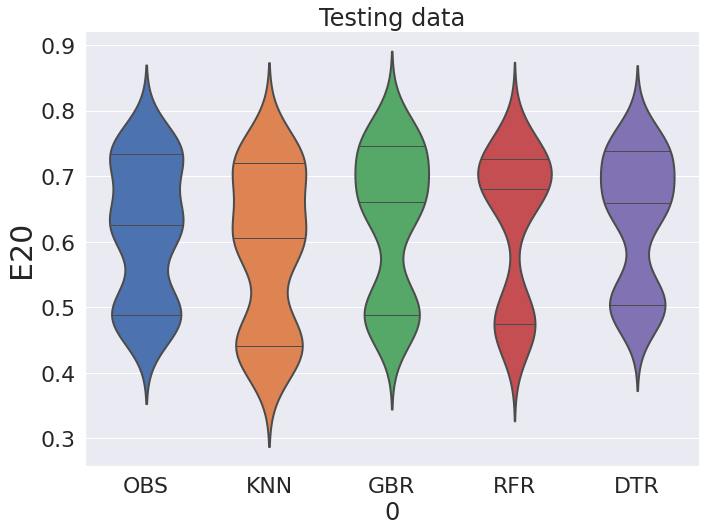

In [177]:
#colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
plt.figure(figsize=(11,8))
sns.set(font_scale=2)
plt.title("Testing data")
sns.violinplot(data=IQR_test2,scale_hue=1,width=.6,bw=0.365, cut=3,linewidth=2,
               scale='width',saturation=1,inner="stick",split=True)
plt.ylabel ("E20",fontsize=30)
#sns.boxplot(data=Train_data2)
plt.savefig("Testing IQR")

# **IQR for Train Data**

In [178]:
ytrain2=ytrain.sort_values(ascending=False,by=['E20'])

In [179]:
q16=np.median(ytrain2['E20'][:52])
print(q16)
q17=np.median(ytrain2['E20'][52:])
print(q17)
q18=np.median(ytrain2['E20'])
print(q18)
IQR_train=q16-q17
print("Actual IQR_train",IQR_train)

0.6972995620834906
0.4480926940982407
0.5501684986139055
Actual IQR_train 0.24920686798524994


In [184]:

ypred_dt2=dt_model.predict(xtrain)
ypred_rf2=rf_model.predict(xtrain)
ypred_knn2=knn_model.predict(xtrain)
ypred_gbr2=gbr_model.predict(xtrain)

In [185]:
ypred_knn3=pd.DataFrame(ypred_knn2,columns=['knn'])
ypred_knn3.head(3)

,knn
0,0.758432
1,0.717474
2,0.699334


In [186]:
ypred_knn3=ypred_knn3.sort_values(ascending=False,by=['knn'])

In [187]:
ypred_knn3.shape

(105, 1)

In [188]:
q19=np.median(ypred_knn3['knn'][:52])
q20=np.median(ypred_knn3['knn'][52:])
q21=np.median(ypred_knn3['knn'])
print(q19,q20,q21)
IQR_knn2=q19-q20
print(IQR_knn2)

0.7012899839873241 0.4210858236029937 0.5641798687275955
0.28020416038433044


In [189]:
ypred_gbr3=pd.DataFrame(ypred_gbr2,columns=['gbr'])
ypred_gbr3.head()

,gbr
0,0.831755
1,0.643179
2,0.736265
3,0.431534
4,0.427445


In [190]:
ypred_gbr3=ypred_gbr3.sort_values(ascending=False,by=['gbr'])

In [191]:
q22=np.median(ypred_gbr3['gbr'][:52])
q23=np.median(ypred_gbr3['gbr'][52:])
q24=np.median(ypred_gbr3['gbr'])
print(q22,q23,q24)
IQR_gbr2=q22-q23
print(IQR_gbr2)

0.6992326785773777 0.4362668633150627 0.5363951460502945
0.262965815262315


In [192]:
ypred_rf3=pd.DataFrame(ypred_rf2,columns=['rf'])
ypred_rf3.head()

,rf
0,0.844101
1,0.650291
2,0.714862
3,0.438366
4,0.398057


In [193]:
ypred_rf3=ypred_rf3.sort_values(ascending=False,by=['rf'])

In [194]:
q25=np.median(ypred_rf3['rf'][:52])
q26=np.median(ypred_rf3['rf'][52:])
q27=np.median(ypred_rf3['rf'])
print(q25,q26,q27)
IQR_rf2=q25-q26
print(IQR_rf2)

0.7021327981531246 0.42973792037014835 0.54428256857302
0.2723948777829762


In [195]:
ypred_dt3=pd.DataFrame(ypred_dt2,columns=['dt'])
ypred_dt3.head(3)

,dt
0,0.883335
1,0.679655
2,0.688419


In [196]:
ypred_dt3=ypred_dt3.sort_values(by='dt',ascending=False)

In [197]:
q28=np.median(ypred_dt3['dt'][:52])
q29=np.median(ypred_dt3['dt'][52:])
q30=np.median(ypred_dt3['dt'])
print(q28,q29,q30)
IQR_dt2=q28-q29
print(IQR_dt2)

0.688419495043889 0.41132814387105376 0.5061220457197323
0.27709135117283523


In [198]:
IQR_train=pd.DataFrame({'Summary':['OBS','KNN','GBR','RFR','DTR'],'Q1':[q16,q19,q22,q25,q28],'Q2':[q17,q20,q23,q26,q29],
                       'Q3':[q18,q21,q24,q27,q30],'IQR':[IQR_train,IQR_knn2,IQR_gbr2,IQR_rf2,IQR_dt2]})
                      
IQR_train

,Summary,Q1,Q2,Q3,IQR
0,OBS,0.697300,0.448093,0.550168,0.249207
1,KNN,0.701290,0.421086,0.564180,0.280204
2,GBR,0.699233,0.436267,0.536395,0.262966
3,RFR,0.702133,0.429738,0.544283,0.272395
4,DTR,0.688419,0.411328,0.506122,0.277091


In [199]:
IQR_train.to_excel("IQR_train.xlsx",index=False)

In [200]:
IQR_train2=IQR_train.T

In [201]:
IQR_train2=IQR_train2.reset_index()

In [202]:
IQR_train2.columns=IQR_train2.iloc[0]
IQR_train2

,Summary,OBS,KNN,GBR,RFR,DTR
0,Summary,OBS,KNN,GBR,RFR,DTR
1,Q1,0.6973,0.70129,0.699233,0.702133,0.688419
2,Q2,0.448093,0.421086,0.436267,0.429738,0.411328
3,Q3,0.550168,0.56418,0.536395,0.544283,0.506122
4,IQR,0.249207,0.280204,0.262966,0.272395,0.277091


In [203]:
IQR_train2=IQR_train2[1:]
IQR_train2

,Summary,OBS,KNN,GBR,RFR,DTR
1,Q1,0.6973,0.70129,0.699233,0.702133,0.688419
2,Q2,0.448093,0.421086,0.436267,0.429738,0.411328
3,Q3,0.550168,0.56418,0.536395,0.544283,0.506122
4,IQR,0.249207,0.280204,0.262966,0.272395,0.277091


In [204]:
IQR_train2=IQR_train2.drop(index=4,axis=0)
IQR_train2

,Summary,OBS,KNN,GBR,RFR,DTR
1,Q1,0.6973,0.70129,0.699233,0.702133,0.688419
2,Q2,0.448093,0.421086,0.436267,0.429738,0.411328
3,Q3,0.550168,0.56418,0.536395,0.544283,0.506122


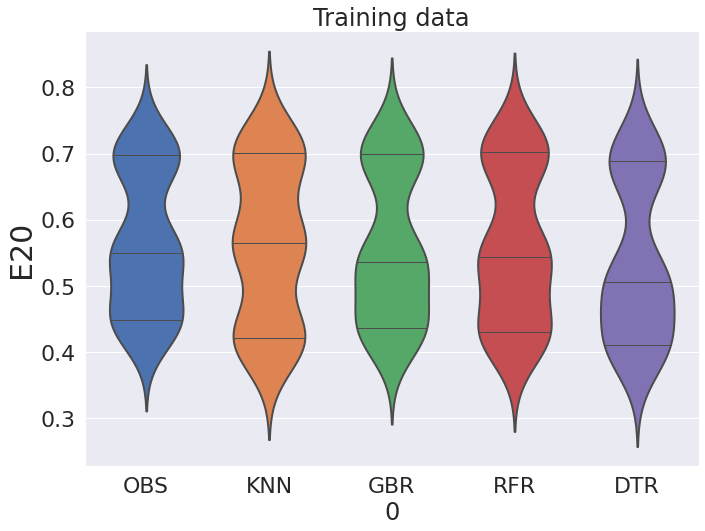

In [205]:
#colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']
plt.figure(figsize=(11,8))
sns.set(font_scale=2)
plt.title("Training data")
sns.violinplot(data=IQR_train2,scale_hue=1,width=.6,bw=0.365, cut=3,linewidth=2,
               scale='width',saturation=1,inner="stick",split=True)
plt.ylabel ("E20",fontsize=30)
#sns.boxplot(data=Train_data2)
plt.savefig("Training IQR")